In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm
import ISLP as islp
from ISLP.models import summarize
import utils
from scipy import stats
sns.set_theme()

%load_ext autoreload
%autoreload 2

### 01 - Loading dataset

In [3]:
boston = pd.read_csv('boston.csv')

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### 02 - Fitting the model

In [5]:
# Let's fit 'lstat', 'age' onto 'medv'.
X = boston[['lstat', 'age']]
X = sm.add_constant(X)
y = boston['medv']
model = sm.OLS(y, X).fit()
utils.get_summary(model, summary=True)

AttributeError: module 'utils' has no attribute 'get_summary'

In [9]:
# Let's fit all the variables onto 'medv'.
X = boston.drop(columns='medv')
X = sm.add_constant(X)
y = boston['medv']
model = sm.OLS(y, X).fit()
utils.get_summary(model, summary=True)

,coef,std_err,t,p
const,41.6173,4.9360,8.4313,0.0000
crim,-0.1214,0.0330,-3.6784,0.0003
zn,0.0470,0.0139,3.3838,0.0008
indus,0.0135,0.0621,0.2167,0.8285
chas,2.8400,0.8700,3.2643,0.0012
nox,-18.7580,3.8514,-4.8705,0.0000
rm,3.6581,0.4202,8.7047,0.0000
age,0.0036,0.0133,0.2709,0.7866
dis,-1.4908,0.2016,-7.3938,0.0000
rad,0.2894,0.0669,4.3254,0.0000


In [10]:
# Lets fit all variables except 'age' onto 'medv'.
X = boston.drop(columns=['medv', 'age'])
X = sm.add_constant(X)
y = boston['medv']
model = sm.OLS(y, X).fit()
utils.get_summary(model, summary=True)

,coef,std_err,t,p
const,41.5251,4.9197,8.4406,0.0000
crim,-0.1214,0.0330,-3.6830,0.0003
zn,0.0465,0.0138,3.3788,0.0008
indus,0.0135,0.0621,0.2166,0.8286
chas,2.8528,0.8679,3.2869,0.0011
nox,-18.4851,3.7137,-4.9775,0.0000
rm,3.6811,0.4112,8.9514,0.0000
dis,-1.5068,0.1926,-7.8246,0.0000
rad,0.2879,0.0666,4.3217,0.0000
tax,-0.0127,0.0038,-3.3333,0.0009


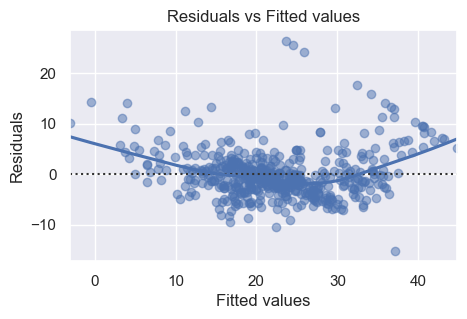

In [21]:
# Let's plot the residuals for the last model.
fig, ax = subplots(figsize=(5, 3))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax, scatter_kws={'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted values');

### 03 - Evaluating the Model

In [10]:
r_squared, rse = utils.get_stats(model, r_squared=True), utils.get_stats(model, rse=True)
r_squared, rse

(0.5513, 6.1731)